In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Let's generate some fake data for linear regression:

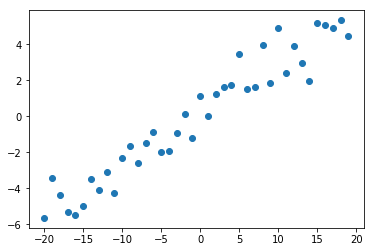

In [3]:
x = np.arange(-20,20)
y = 0.3 * x + np.random.randn(40)
plt.scatter(x,y);

For simplicity, let's assume we know the intercept (zero) and noise distribution (standard normal). Our goal is just to find the slope. So for the $n$th point, we have

$$
y_n \sim \mathcal{N}(\beta x_n, 1)
$$

Let's assume the $y$ values are independent. By the current frequentist approach, the parameter $\beta$ is assumed to be unknown, but fixed. So the probability of the observation is just

$$
P\left(y\ |\ \beta\right)	
= \prod_{N\text{ points}} P(y_n\ |\ \beta)
=\prod_{N\text{ points}}\mathcal{N}\left(y_{n}\ |\ \beta x_{n},1\right)
	=\prod_{N\text{ points}}\left(\frac{1}{\sqrt{2\pi}}\exp\left\{ \frac{-\left(y_{n}-\beta x_{n}\right)^2}{2}\right\} \right)
    $$

We've been considering this as a function of $y$, but since we've observed data, we're really more interested in it as a function of $\beta$. This is the *likelihood*, 

$$
\mathcal{L}(\beta|y) = P(y|\beta)
$$

An analogy might be helpful in understanding this. If I add up the amount you spend on housing, food, ice cream etc plus the amount saved, it should equal your income. There's no getting around that, just as with a probability distribution. But if I add your ice cream costs to your friends, and add the ice cream costs of everyone any of us know... It's no longer constrained. The total ice cream cost might be more than any one of us makes.

This is how likelihood works. It's still a probability (or probability density, for continuous variables), but the thing changing isn't the random variable, but the parameter. So there's no requirement the likelihood values add to one.

We're interested in the *maximum likelihood estimate*, which estimates the parameter by maximizing the likelihood function. In other words, **finding the value of the parameter with the highest probability of generating the data we did, in fact, observe**.

So combining what we have to this point, we'd like to estimate $\beta$ by finding the value that maximizes the likelihood,

$$
\mathcal{L}(\beta|y) = \prod_{N\text{ points}}\left(\frac{1}{\sqrt{2\pi}}\exp\left\{ \frac{-\left(y_{n}-\beta x_{n}\right)^2}{2}\right\} \right)
$$

So far, so good. What's a good way to maximize things? There are lots, but since we're working in terms of smooth functions, it will probably be quickest to work in terms of derivatives.

But differentiating a product is a mess. Do we really have to do it this way? Spoiler: no.

It would be so much easier to work in terms of a sum, instead of a product. Then the derivative would be easy - we could just calculate term by term.

But we *can* work in terms of a sum! Let's just take the log of both sides:


\begin{align*}
\log \mathcal{L}(\beta|y) 
&= \log \prod_{N\text{ points}}\left(\frac{1}{\sqrt{2\pi}}\exp\left\{ \frac{-\left(y_{n}-\beta x_{n}\right)^2}{2}\right\} \right) 
\\ &= \sum_{N\text{ points}} \log \left(\frac{1}{\sqrt{2\pi}}\exp\left\{ \frac{-\left(y_{n}-\beta x_{n}\right)^2}{2}\right\} \right) 
\\ &= \sum_{N\text{ points}} \left[ \log \frac{1}{\sqrt{2\pi}} - \frac{\left(y_{n}-\beta x_{n}\right)^2}{2} \right]
\\ &= C - \frac{1}{2}\sum_{N\text{ points}} \left(y_{n}-\beta x_{n}\right)^2
\end{align*}


Ok, time for the big reveal. Look at that line. To maximize that, we could remove the negative and minimize. 

**For a normal linear model, maximum likelihood estimation reduces to ordinary least squares.**